<h1> Project: Wrangling and Analyze Data [WeRateDogs Twitter Archived Data] </h1>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#issues">Identifying Issues</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#storing">Storing Data</a></li>
<li><a href="#analysis">Analyzing and Visualizing Data</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>



<a id='intro'></a>
## Introduction

### Dataset Description

> In order to get valuable insights from a data one must first go through the process of wrangling the data in question. The process of wrangling involves assessing the data both virtually and programmatically to see loopholes or issues present in the data. In this project, I would carry out wrangling process on tweets archive data from an account on twitter known as WeRateDogs.
> This account gives rating of Dogs in a very amazing manner. This project covers wrangling the twitter archived data and other subsidiary parts of the general dataset. After assessing the issues, the process of cleaning the data to get more a presentable data commences.
> Upon completion of the wrangling process, to draw some very interesting insight on the data. I would carry out a proper analysis on the data, showing and exploring interesting facts about the data.
>
#### Question(s) for Analysis
 During this Analysis, We would address some question drawn from this question. The few questions that would be addressed a listed below:
> <li>What are the top 5 most liked posts?</li>
> <li>What type of dog appeared the most?</li>
> <li>What are the most retweeted post?</li>

<a id= 'gathering'></a>
## Data Gathering
In the cell below, we would gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
>The first dataset is downloaded directly from the source.

In [26]:
# Importing python libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
twitter_archived = pd.read_csv('twitter-archive-enhanced.csv')
# reading the csv file using pandas read_csv file

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)
>By using the requests library, the image prediction is gotten from the [url provided](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image_predictions/image-predictions.tsv). The contents are written to image-prediction.tsv file as shown in the next cell.

In [30]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

with open('image-predictions.tsv', 'wb') as file:
    resp = requests.get(url)  # this sends a request to get the contents of the url
    file.write(resp.content)  # writes the content of the url to the file variable name.

In [31]:
image_pred = pd.read_csv('image-predictions.tsv', sep= '\t')  # the file gotten is then called using pandas

4. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)
> The dataset provided on the udacity course would be used because of difficulty to gain access to the twitter API.

In [88]:
tweet_json = pd.read_json('tweet-json copy', lines=True)

<a id='assess'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessment to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [89]:
twitter_archived

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [90]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [91]:
tweet_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [92]:
tweet_json.entities.head()

0    {'hashtags': [], 'symbols': [], 'user_mentions...
1    {'hashtags': [], 'symbols': [], 'user_mentions...
2    {'hashtags': [], 'symbols': [], 'user_mentions...
3    {'hashtags': [], 'symbols': [], 'user_mentions...
4    {'hashtags': [{'text': 'BarkWeek', 'indices': ...
Name: entities, dtype: object

In [93]:
twitter_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [94]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [95]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [96]:
twitter_archived.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [97]:
twitter_archived.duplicated().sum()

0

In [98]:
image_pred.duplicated().sum()

0

In [99]:
tweet_json.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [100]:
image_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [101]:
tweet_json.corr()

,id,id_str,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
id,1.000000,1.000000,NaN,0.940568,0.940568,0.135083,0.135083,NaN,NaN,NaN,0.128965,0.389995,0.528210,0.070496,NaN,NaN,NaN,0.977912,0.977912
id_str,1.000000,1.000000,NaN,0.940568,0.940568,0.135083,0.135083,NaN,NaN,NaN,0.128965,0.389995,0.528210,0.070496,NaN,NaN,NaN,0.977912,0.977912
truncated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_reply_to_status_id,0.940568,0.940568,NaN,1.000000,1.000000,0.136589,0.136589,NaN,NaN,NaN,NaN,-0.213959,0.042125,0.202767,NaN,NaN,NaN,NaN,NaN
in_reply_to_status_id_str,0.940568,0.940568,NaN,1.000000,1.000000,0.136589,0.136589,NaN,NaN,NaN,NaN,-0.213959,0.042125,0.202767,NaN,NaN,NaN,NaN,NaN
in_reply_to_user_id,0.135083,0.135083,NaN,0.136589,0.136589,1.000000,1.000000,NaN,NaN,NaN,NaN,-0.088934,-0.090030,-0.018440,NaN,NaN,NaN,NaN,NaN
in_reply_to_user_id_str,0.135083,0.135083,NaN,0.136589,0.136589,1.000000,1.000000,NaN,NaN,NaN,NaN,-0.088934,-0.090030,-0.018440,NaN,NaN,NaN,NaN,NaN
geo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coordinates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contributors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



<a id = 'issues'></a>
## Identifying Issues.
After carefully assessing the data both virtually by scrolling through the data and programmatically checking for issues, I was able to come up with these issues which are divided into two categories, Quality issues and the Tidiness issues.

<h3> Quality issues </h3>
<p>
This issues contains problems regarding completeness of the data (i.e. how accurate the data is), validity of the data ( which is categorized by how real the data is) amongst others.
</p>

<b> 1. Missing Values </b>

Missing values are present in the following columns:

* in_reply_to_status_id

* in_reply_to_user_id

* retweeted_status_id

* retweeted_status_user_id

* retweeted_status_timestamp

Missing values present in the following columns:

* in_reply_to_status_id

* in_reply_to_status_id_str

* in_reply_to_user_id

* in_reply_to_user_id_str

* in_reply_to_screen_time

* geo

* coordinates

<b> 2. The rating_numerator are sometimes above the rating_denominator column. <b>

<b> 3. Some dogs where without name </b.

<b> 4. Some Images were not Dogs.</b>

<b> 5. The columns converted to strings still has an integer datatype. </b>

<b> 6. The columns: doggo, floofer, pupper and puppo are all known as affectionate words for dog and don't give a well detailed relationship between the with the tweets. </b>

<b> 7. The id column in the image prediction dataset was in an ascending order while the others are in a descending order. </b>

<b> 8. Some images are not correctly categorized.</b>



<h3> Tidiness issues </h3>

<b> 1. Inconsistent number of rows across the three data. </b>

<b> 2. The entities columns present in the tweet_json data contained other sub-columns. </b>


<a id= 'cleaning'></a>
<h2> Cleaning Data </h2>
In this section, clean **all** of the issues you documented while assessing. 

<b> Note:</b> Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [102]:
# Make copies of original pieces of data
twitter_archived_copy = twitter_archived.copy()
image_pred_copy = image_pred.copy()
tweet_json_copy = tweet_json.copy()

### Issue #1: Missing Values present in Archived Tweets.

<b> Define: The Archived Tweets dataset (twitter_archived) contained missing values. To solve this issue, I would drop off the columns with large amount of missing values and drop of rows with small amount of missing values. </b>


<h4>Codes</h4>
<p> A function to drop off missing values is written first. Then, the columns which contains a lot of missing values are dropped off. </p>

In [103]:
def drop_missing(df, lists, axis):
    """ The function takes in a dataset and a list of the columns to be dropped off, also the axis to be dropped from."""
    df.drop(lists, axis= axis, inplace = True)
    return df.head()

In [104]:
twitter_archived_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [105]:
drop_col = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls']
drop_missing(twitter_archived_copy, drop_col, axis= 1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


#### Test

In [106]:
twitter_archived_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2356 non-null   object
 7   doggo               2356 non-null   object
 8   floofer             2356 non-null   object
 9   pupper              2356 non-null   object
 10  puppo               2356 non-null   object
dtypes: int64(3), object(8)
memory usage: 202.6+ KB


### Issue #2: Missing Values are present in the JSON file extracted from the Twitter API

##### Define: The missing values present are to be dropped since the values are not easily replaced. I would use the function defined above.


#### Code

In [107]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [108]:
drop_json = ['in_reply_to_status_id', 'in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name', 'geo','coordinates', 'retweeted_status', 'quoted_status_id', 'quoted_status_id', 'quoted_status_id_str','quoted_status']

In [109]:
drop_missing(df= tweet_json_copy, lists=drop_json, axis= 1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,user,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",None,NaN,False,8853,39467,False,False,0.0,0.0,en
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",None,NaN,False,6514,33819,False,False,0.0,0.0,en
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",None,NaN,False,4328,25461,False,False,0.0,0.0,en
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",None,NaN,False,8964,42908,False,False,0.0,0.0,en
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",None,NaN,False,9774,41048,False,False,0.0,0.0,en


#### Test

In [110]:
tweet_json_copy.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,user,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",None,NaN,False,8853,39467,False,False,0.0,0.0,en
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",None,NaN,False,6514,33819,False,False,0.0,0.0,en
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",None,NaN,False,4328,25461,False,False,0.0,0.0,en
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",None,NaN,False,8964,42908,False,False,0.0,0.0,en
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",None,NaN,False,9774,41048,False,False,0.0,0.0,en


#### Issue 3: Wrong datatypes.

##### Define: Some columns present in the tweet_json dataset have a wrong datatype. I would go ahead to change the datatype of this columns

#### Code

In [111]:
def change_type(df, col, dtype):
    df[col] = df[col].astype(str(dtype))
    return df.info()

In [112]:
cols  = ['id_str']
change_type(df= tweet_json_copy, col= cols, dtype= 'str')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   object             
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   user                           2354 non-null   object             
 10  place                   

<a id = 'storing'></a>

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv". First, the id column name is changed so all the datasets have an id column. Then, the three individual datasets are merged into a single CSV file named "twitter_archive_master.csv".

In [113]:
twitter_archived_copy.rename(columns={'tweet_id': 'id'}, inplace= True)

In [114]:
twitter_archived_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2356 non-null   object
 7   doggo               2356 non-null   object
 8   floofer             2356 non-null   object
 9   pupper              2356 non-null   object
 10  puppo               2356 non-null   object
dtypes: int64(3), object(8)
memory usage: 202.6+ KB


In [115]:
merged_twitter = pd.merge(left= twitter_archived_copy, right= tweet_json_copy, left_on= 'id', right_on= 'id')

In [116]:
image_pred_copy.rename(columns = {'tweet_id': 'id'}, inplace = True)

In [117]:
merged_comp = pd.merge(left= merged_twitter,right= image_pred_copy, left_on= 'id', right_on= 'id')

In [118]:
merged_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   id                             2073 non-null   int64              
 1   timestamp                      2073 non-null   object             
 2   source_x                       2073 non-null   object             
 3   text                           2073 non-null   object             
 4   rating_numerator               2073 non-null   int64              
 5   rating_denominator             2073 non-null   int64              
 6   name                           2073 non-null   object             
 7   doggo                          2073 non-null   object             
 8   floofer                        2073 non-null   object             
 9   pupper                         2073 non-null   object             
 10  puppo                   

In [119]:
miss_comp = ['place', 'contributors']
drop_missing(df= merged_comp, lists= miss_comp, axis= 1)

,id,timestamp,source_x,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [120]:
merged_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   id                             2073 non-null   int64              
 1   timestamp                      2073 non-null   object             
 2   source_x                       2073 non-null   object             
 3   text                           2073 non-null   object             
 4   rating_numerator               2073 non-null   int64              
 5   rating_denominator             2073 non-null   int64              
 6   name                           2073 non-null   object             
 7   doggo                          2073 non-null   object             
 8   floofer                        2073 non-null   object             
 9   pupper                         2073 non-null   object             
 10  puppo                   

In [65]:
merged_comp.to_csv('twitter_archive_master.csv', index= False, header=False)

<a id= 'analysis'></a>
## Analyzing and Visualizing Data

From the dataset gotten,we would carry out an analysis on the dataset and draw out some interesting insights and also give necessary visualization when needed.

### Insights:
Answers to the following questions would be drawn by programmatically analyzing the data. Different methods and functions provided in pandas would be used to draw out major conclusions and insights.

The following questions would be dealt with moving forward.

1. What are the top 5 most liked posts?

2. What type of dog appeared the most?

3. What are the most retweeted post?



#### Question 1: What are the top 5 most liked posts?
<p> Posts which people love a lot earn more likes than those that are not their favorite. The top 5 favorite posts are the posts with the most favorite count. To get the top 5 liked posts, we simply check out the post wih the highest favorite score. </p>


In [66]:
desc_fav = merged_comp.sort_values('favorite_count', ascending= False)

In [67]:
fav_group = desc_fav.head(5)

In [68]:
fav_group

,id,timestamp,source_x,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
329,822872901745569793,2017-01-21 18:26:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,13,10,None,None,None,None,...,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True
851,744234799360020481,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,13,10,None,doggo,None,None,...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
59,879415818425184262,2017-06-26 19:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,13,10,Duddles,None,None,None,...,1,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True
432,807106840509214720,2016-12-09 06:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,13,10,Stephan,None,None,None,...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
112,866450705531457537,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,13,10,Jamesy,None,None,pupper,...,2,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True


In [69]:
labels_id = ['id1', 'id2', 'id3', 'id4', 'id5']

In [70]:
def bar(x,y):
    plt.figure(figsize= (30,20))
    sns.barplot(x, y )

C:\Users\Testys\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Favorite Count')

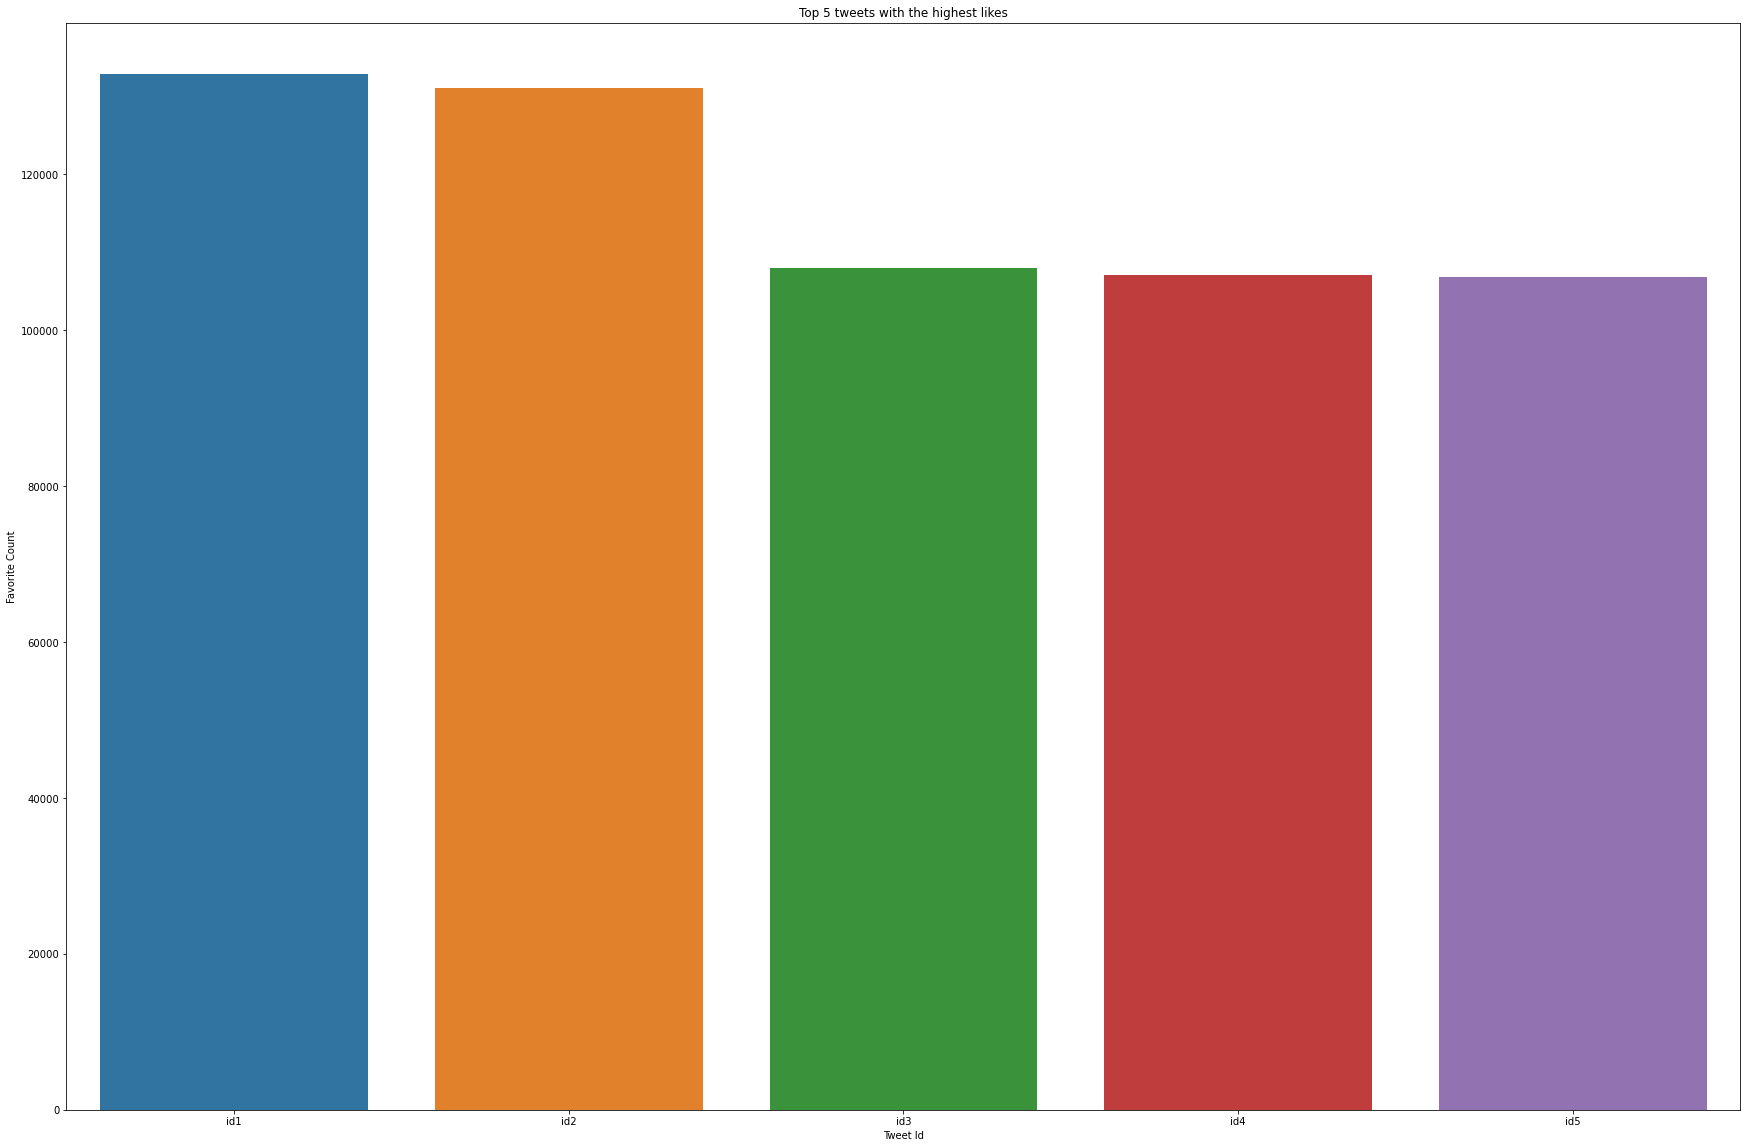

In [71]:
bar(x= labels_id, y=fav_group.favorite_count)
plt.title('Top 5 tweets with the highest likes')
plt.xlabel('Tweet Id')
plt.ylabel('Favorite Count')

> The chart shows the top 5 tweet with the highest likes. The chart shows this from the highest to the lowest.

#### Question 2: What dogs appeared the most?
According to the posts, different type of dogs were rated by the account handler. Here, we get the top 5 dogs that appear the most on the twitter account.

In [72]:
p1 = merged_comp.p1.value_counts()
p1

golden_retriever      150
Labrador_retriever    100
Pembroke               88
Chihuahua              83
pug                    57
                     ... 
water_bottle            1
damselfly               1
military_uniform        1
nail                    1
conch                   1
Name: p1, Length: 378, dtype: int64

In [73]:
p2 = merged_comp.p2.value_counts()
p2

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
ashcan                  1
shovel                  1
hay                     1
computer_keyboard       1
bow                     1
Name: p2, Length: 404, dtype: int64

In [74]:
p3 = merged_comp.p3.value_counts()
p3

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
screen                 1
bell_cote              1
hatchet                1
chickadee              1
screw                  1
Name: p3, Length: 407, dtype: int64

In [75]:
total_dogs = p1 + p2 + p3

In [76]:
total_dogs.sort_values(ascending= False, inplace= True)

In [77]:
top_5_dogs = total_dogs.head(5)

In [78]:
top_5_dogs

golden_retriever      290.0
Labrador_retriever    283.0
Chihuahua             185.0
Pembroke              142.0
Cardigan              115.0
dtype: float64

C:\Users\Testys\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of time appeared.')

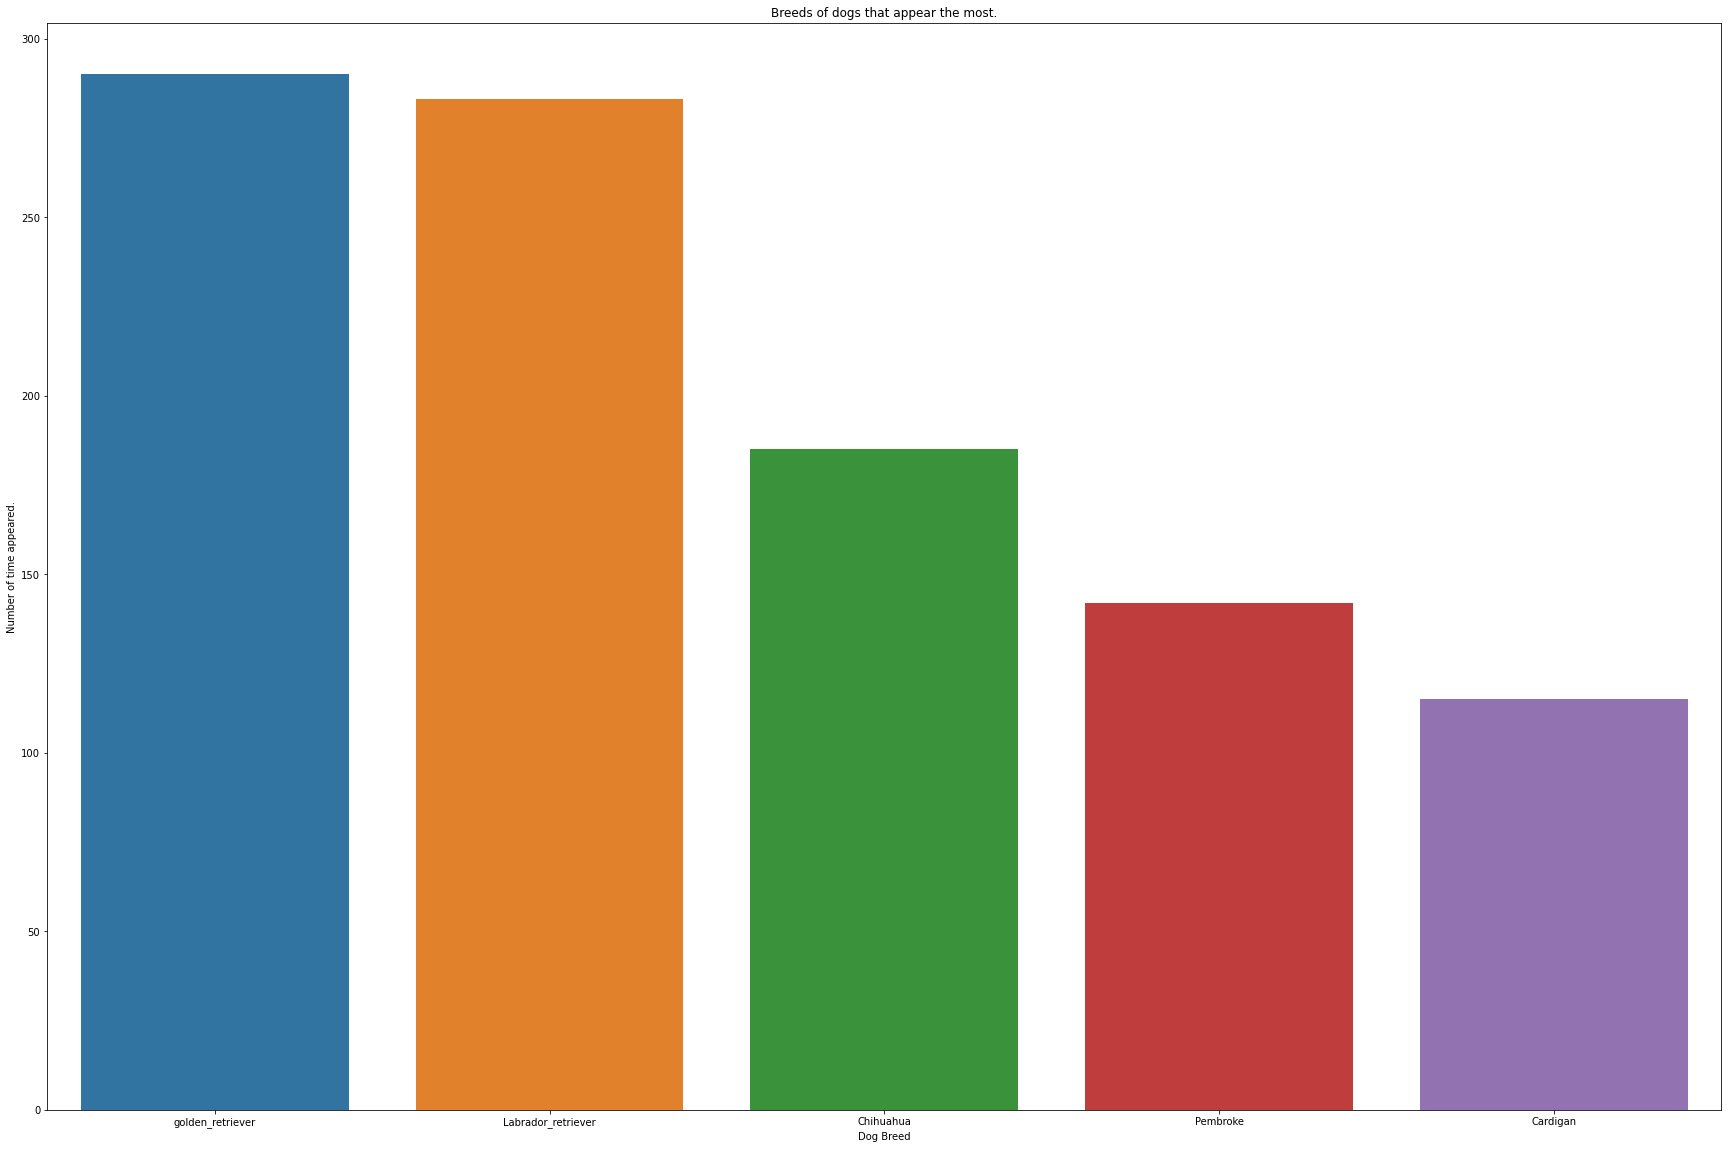

In [79]:
bar(x= top_5_dogs.index, y= top_5_dogs)
plt.title('Breeds of dogs that appear the most.')
plt.xlabel('Dog Breed')
plt.ylabel('Number of time appeared.')

The above diagram shows the dog with the most breed, we can assume that since this dogs showed up a lot, people were very much interested in them.

#### Question 3: What is the most retweeted post?


In [80]:
most_retweeted = merged_comp.sort_values('retweet_count', ascending= False)

In [81]:
most_retweeted

,id,timestamp,source_x,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
851,744234799360020481,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,13,10,None,doggo,None,None,...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
432,807106840509214720,2016-12-09 06:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,13,10,Stephan,None,None,None,...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
209,842892208864923648,2017-03-18 00:15:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Stephan. He just wants ...,13,10,Stephan,None,None,None,...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
886,739238157791694849,2016-06-04 23:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,13,10,None,doggo,None,None,...,1,Eskimo_dog,0.503372,True,Siberian_husky,0.390413,True,malamute,0.080901,True
329,822872901745569793,2017-01-21 18:26:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,13,10,None,None,None,None,...,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,668291999406125056,2015-11-22 04:56:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can't do better than he did. 10/10 https://t...,10,10,None,None,None,None,...,1,web_site,0.995535,False,skunk,0.001363,False,badger,0.000686,False
1978,667550882905632768,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,5,10,None,None,None,None,...,1,web_site,0.998258,False,dishwasher,0.000201,False,oscilloscope,0.000142,False
2036,666447344410484738,2015-11-17 02:46:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. She is a black Downton Abbey. I...,9,10,Scout,None,None,None,...,1,curly-coated_retriever,0.322084,True,giant_schnauzer,0.287955,True,Labrador_retriever,0.166331,True
171,851861385021730816,2017-04-11 18:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @eddie_coe98: Thanks @dog_rates completed m...,10,10,None,None,None,None,...,1,pencil_box,0.662183,False,purse,0.066505,False,pillow,0.044725,False


The most retweeted post is with the id: 744234799360020481, which was retweeted 79525. The post contained a Labrador retriever and a Whippet.

Text(0, 0.5, 'Number of Likes')

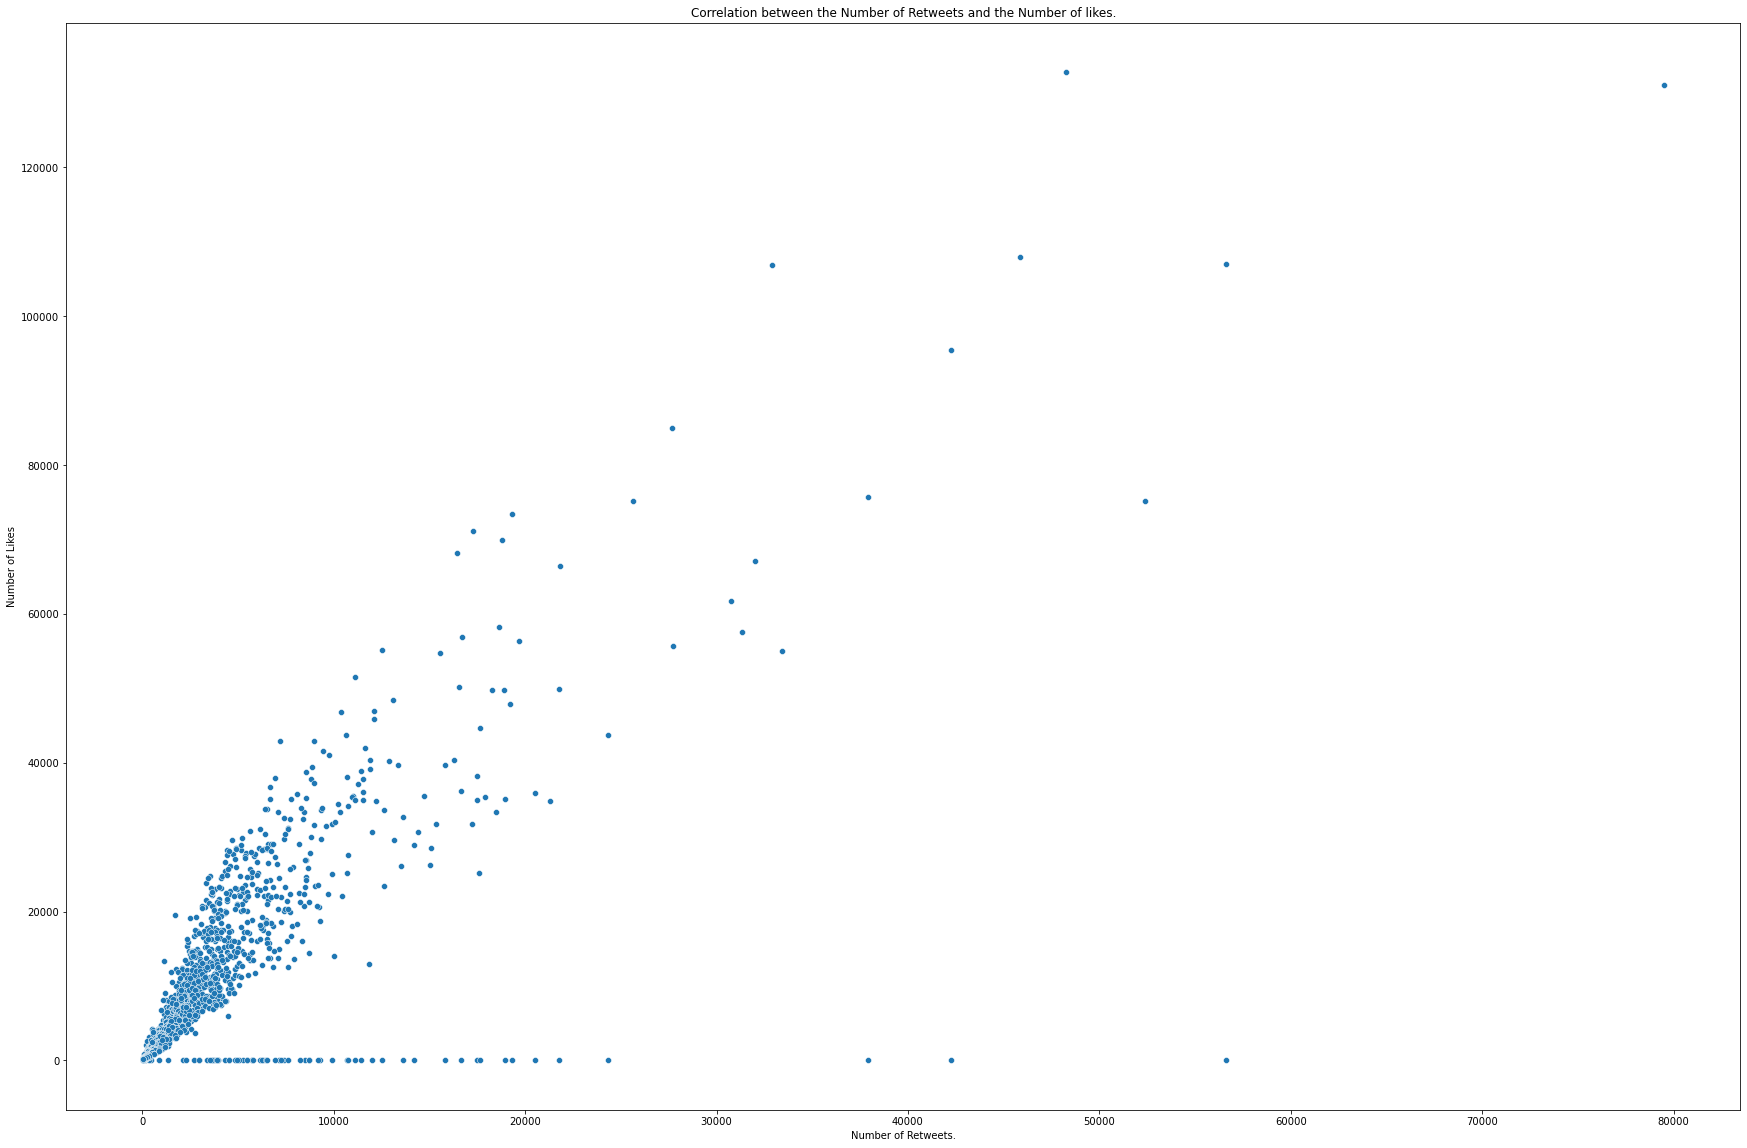

In [87]:
plt.figure(figsize = (30,20))
sns.scatterplot(x= merged_comp.retweet_count, y= merged_comp.favorite_count)
plt.title('Correlation between the Number of Retweets and the Number of likes.')
plt.xlabel('Number of Retweets.')
plt.ylabel('Number of Likes')

The above chart shows a correlation between the retweet_count and the favorite_count. It shows a positive correlation between the two columns

<body>
<a id = 'conclusions'></a>
<h2> Conclusions </h2>

In conclusion, a proper wrangling and cleaning exercise was carried out on the dataset has shown above. First, the data was gather using the request module to programmatically download the image prediction tsv file off the website. Then, the other two datasets where read using the pandas read_csv function.

Afterwards, each data was assessed one after the other both programmatically and virtually, while assessing the datasets, we came across some issues that where perfectly listed in the <a href="#assess">Assessing Data</a> section.

In order to move forward with analyzing the data, the data was further cleaned to take care of these issues, as shown above in the <a href="#cleaning">Cleaning Data</a> section. After proper cleaning, the data set was then merged together to get a new data which was named twitter_archive_master.csv file. In order to save this file to a csv file, I used the pandas to_csv function to carry out the operation.

Moving on to the next task, I went ahead to analyze the data to get insights from the data. In answering the questions posed above, I did the following:
> To answer the first question,

<h2> Limitation </h2>
<li> For some columns with missing values, due to their unavailabilty originally it is impossible to fill them. Hence, one option to solving this issue is filling the missing values with "Not Avaliable" or, the columns with this type of issue can easily be dropped off after getting any insights available.
</li>
<li>
</li>
</body>
